In [1]:
import pickle 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import glob

In [2]:
def get_info(scratch_path, dataset, mode, fairness_method, gamma_val, setting = None, verbose=False): 
    if mode == 'BOOST': 
        fmt_path = glob.glob(f'{scratch_path}{dataset}/{mode}/boost2/FMT_AVG_*_{fairness_method}*.xlsx')[0] 
    elif setting == 'T': 
        fmt_path = glob.glob(f'{scratch_path}{dataset}/{mode}/FMT_AVG_*{setting}_{fairness_method}*.xlsx')[0] 
    else:    
        fmt_path = glob.glob(f'{scratch_path}{dataset}/{mode}/FMT_AVG_*_{fairness_method}*.xlsx')[0] 
    
#     print(fmt_path)
    fmt_data = pd.read_excel(fmt_path)
    if verbose: 
        print(fmt_data)
        
    name = gamma_val
    return fmt_data[fmt_data.param == name][report].apply(lambda x: np.round(x, 3)).iloc[0] 


In [3]:
report = ['r_precision', 'competition_ndcg','artist_prec', 'sound_homogeneity',"norm_diversity",  
         'perc_LT', 'LT_item_cvg', 'arid_cvg' ] 
scratch_path = '/home/mila/r/rebecca.salganik/scratch/PinSAGE_experiments/FULL_RUNS/'
dataset = 'MPD_Subset'
fairness_method = 'log10'

In [4]:
# get_info(scratch_path, dataset, 'REDRESS', fairness_method, 'G_0.5', 'T').values

# get_info(scratch_path, dataset, 'BOOST', fairness_method, 'G_0.1', verbose=True).values

get_info(scratch_path, 'MPD_Subset', 'MACR', fairness_method, 5, setting='T', verbose=True)

get_info(scratch_path, 'LFM_Subset', 'MACR2', fairness_method, 5, setting='T', verbose=True)


# get_info(scratch_path, 'MPD_Subset', 'SR2', fairness_method, 'G_0.1', 'T', verbose=True)

   Unnamed: 0  param  r_precision  competition_ndcg  artist_prec  \
0           0     10      0.00898          0.011876     0.104454   
1           1     20      0.00418          0.006768     0.079357   
2           2     25      0.00364          0.006008     0.071490   
3           3     30      0.00308          0.005394     0.064609   
4           4     35      0.00278          0.004944     0.058832   
5           5     40      0.00248          0.004484     0.054073   
6           6     45      0.00226          0.004115     0.050505   
7           7      5      0.02826          0.029960     0.149139   

   sound_homogeneity  norm_diversity   av_pop  perc_LT  arid_cvg  LT_item_cvg  
0           0.896453         0.92334  3.48098  0.09504  0.010659     0.000903  
1           0.892387         0.93958  2.59662  0.21070  0.010472     0.001744  
2           0.890101         0.92674  2.35472  0.26060  0.010339     0.002018  
3           0.887822         0.91112  2.15392  0.30866  0.010334   

r_precision          0.014
competition_ndcg     0.014
artist_prec          0.049
sound_homogeneity    0.996
norm_diversity       0.777
perc_LT              0.002
LT_item_cvg          0.000
arid_cvg             0.001
Name: 7, dtype: float64

/tmp/ipykernel_35667/479151079.py:130: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(r_value, fontsize=10)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Tahoma
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Tahoma


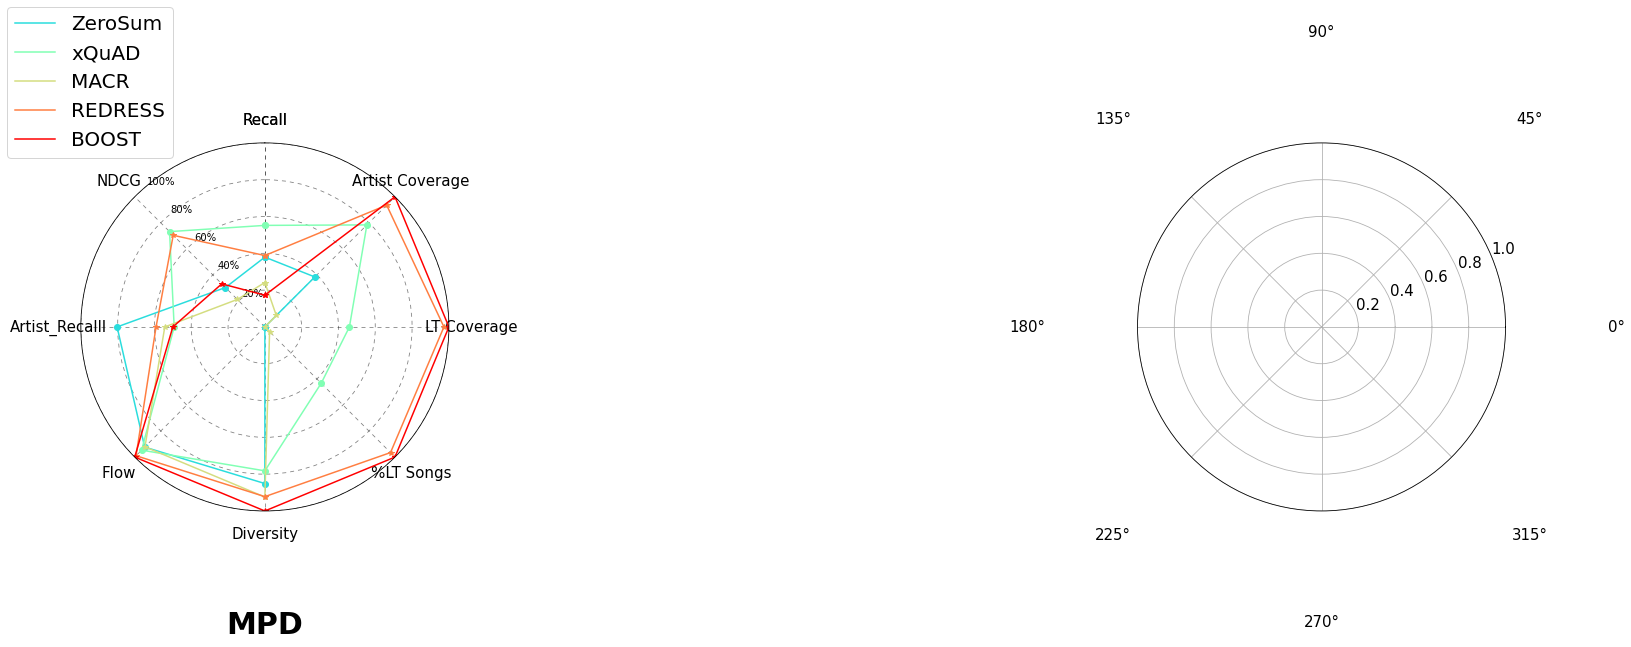

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import cm
import matplotlib.ticker as mtick

def best(array1, array2,):
    best_array = np.array([
        max(array1[0], array2[0], ), #array3[0]
        max(array1[1], array2[1], ), #array3[1]
        max(array1[2], array2[2], ), #array3[2]
        max(array1[3], array2[3], ), #array3[3]
        max(array1[4], array2[4], ), #array3[4]
        max(array1[5], array2[5], ), #array3[5]
        max(array1[6], array2[6], ), #array3[6]
        max(array1[7], array2[7], ), #array3[7]
        max(array1[8], array2[8], ), #array3[8]
    ])
    return best_array

mpl.rcParams['font.size'] = 25
# mpl.rcParams['figure.figsize'] = (67, 20)
# plt.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Tahoma']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

# fig = plt.figure()

fig, axes = plt.subplots(1, 2, figsize=(30, 10), subplot_kw=dict(projection="polar"))

"""MPD"""
# ax1 = fig.add_subplot(131, projection='polar')
p1, p2 = [], []
# PS
p1.append(get_info(scratch_path, 'MPD_Subset', 'REDRESS', fairness_method, 'PinSage', 'T').values)
p2.append(get_info(scratch_path, 'LFM_Subset', 'REDRESS', fairness_method, 'PinSage', 'T').values)

# LGCN
p1.append(get_info(scratch_path, 'MPD_Subset', 'LGCN2', fairness_method, 'vanilla').values)
p2.append(get_info(scratch_path, 'LFM_Subset', 'LGCN2', fairness_method, 'vanilla').values)

# SR
p1.append(get_info(scratch_path, 'MPD_Subset', 'SR2', fairness_method, 'G_0.1', 'T').values)
p2.append(get_info(scratch_path, 'LFM_Subset', 'SR2', fairness_method, 'G_0.5', "T").values)

# X
p1.append(get_info(scratch_path, 'MPD_Subset', 'XQUAD', fairness_method, 'G_0.1').values)
p2.append(get_info(scratch_path, 'LFM_Subset', 'XQUAD', fairness_method, 'G_0.1').values)

# MACR
p1.append(get_info(scratch_path, 'MPD_Subset', 'MACR', fairness_method, 5, 'T').values)
p2.append(get_info(scratch_path, 'LFM_Subset', 'MACR2', fairness_method, 5, 'T').values)

# REDRESS
p1.append(get_info(scratch_path, 'MPD_Subset', 'REDRESS', fairness_method, 'G_0.5', "T").values)
p2.append(get_info(scratch_path, 'LFM_Subset', 'REDRESS', fairness_method, 'G_0.2', "T").values)


# BOOST
p1.append(get_info(scratch_path, 'MPD_Subset', 'BOOST', fairness_method, 'G_0.5', "T").values)
p2.append(get_info(scratch_path, 'LFM_Subset', 'BOOST', fairness_method, 'G_0.6', "T").values)


def draw_row(ax, p, model_name, data_name):
    p = np.array(p)
    p[:, 0] = p[:, 0] / max(p[:, 0])
    p[:, 1] = p[:, 1] / max(p[:, 1])
    p[:, 2] = p[:, 2] / max(p[:, 2]) 
    p[:, 3] = p[:, 3] / max(p[:, 3]) 
    p[:, 4] = p[:, 4] / max(p[:, 4]) 
    p[:, 5] = p[:, 5] / max(p[:, 5]) 
    p[:, 6] = p[:, 6] / max(p[:, 6])
    p[:, 7] = p[:, 7] / max(p[:, 7])
    p = p * 100

    data = []
    for i in range(len(p)):
        data.append(np.array(p[i]).astype(float))
    label = np.array(
        ['Recall', 'NDCG', 'Artist_Recalll', 'Flow', 'Diversity', '%LT Songs', 'LT Coverage',
         "Artist Coverage"])
    label = np.concatenate((label, [label[0]]))

    theta = np.linspace(0, 2 * np.pi, len(data[0]), endpoint=False)
    thetas = np.concatenate((theta, [theta[0]]))
    data1 = np.concatenate((data[0], [data[0][0]]))# PS
    data2 = np.concatenate((data[1], [data[1][0]]))# LGCN
    data3 = np.concatenate((data[2], [data[2][0]]))# SR
    data4 = np.concatenate((data[3], [data[3][0]]))# X
    data5 = np.concatenate((data[4], [data[4][0]]))# MACR
    data6 = np.concatenate((data[5], [data[5][0]]))# REDRESS
    data7 = np.concatenate((data[6], [data[6][0]]))# BOOST

    ax.set_thetagrids(thetas * 180 / np.pi, label)

    color = list(cm.rainbow(np.linspace(0, 1, 7)))
    kwargs1 = {'color': color[0]}
    kwargs2 = {'color': color[1]}
    kwargs3 = {'color': color[2]}
    kwargs4 = {'color': color[3]}
    kwargs5 = {'color': color[4]}
    kwargs6 = {'color': color[5]}
    kwargs7 = {'color': color[6]}
#     ax.plot(thetas, data1, 'o-', **kwargs1)
#     ax.plot([], [], label='PinSAGE', **kwargs1)
#     ax.plot(thetas, data2, 'o-', **kwargs2)
#     ax.plot([], [], label='LGCN', **kwargs2)
    ax.plot(thetas, data3, 'o-', **kwargs3)
    ax.plot([], [], label='ZeroSum', **kwargs3)
    ax.plot(thetas, data4, 'o-', **kwargs4)
    ax.plot([], [], label='xQuAD', **kwargs4)
    ax.plot(thetas, data5, '*-', **kwargs5)
    ax.plot([], [], label='MACR', **kwargs5)
    ax.plot(thetas, data6, '*-', **kwargs6)
    ax.plot([], [], label='REDRESS', **kwargs6)
    ax.plot(thetas, data7, '*-', **kwargs7)
    ax.plot([], [], label='BOOST', **kwargs7)
    ax.set_theta_zero_location('N')
    ax.set_rlim(0, 100)

    ax.legend(loc=(-0.20, 0.96), fontsize=20)
    ax.set_rlabel_position(40) #40 
    ax.tick_params(pad=12, grid_color='k', grid_alpha=0.5, grid_linestyle=(0, (5, 5)))
    ax.set_title(f'{data_name}', fontsize=30, y=-0.35, fontname="Times New Roman", fontweight="bold")

    r_value = ['{:,.0f}'.format(x) + '%' for x in ax.get_yticks()]
    ax.set_yticklabels(r_value, fontsize=10)



draw_row(axes[0], p1, '', 'MPD')
# draw_row(axes[1], p2, '', 'LFM')

# fig.supxlabel("Performance Breakdown", fontsize=48, y=0.01, fontname="Times New Roman", fontweight="bold")
plt.tight_layout()
plt.show()

/tmp/ipykernel_52656/598842153.py:112: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(r_value, fontsize=20)


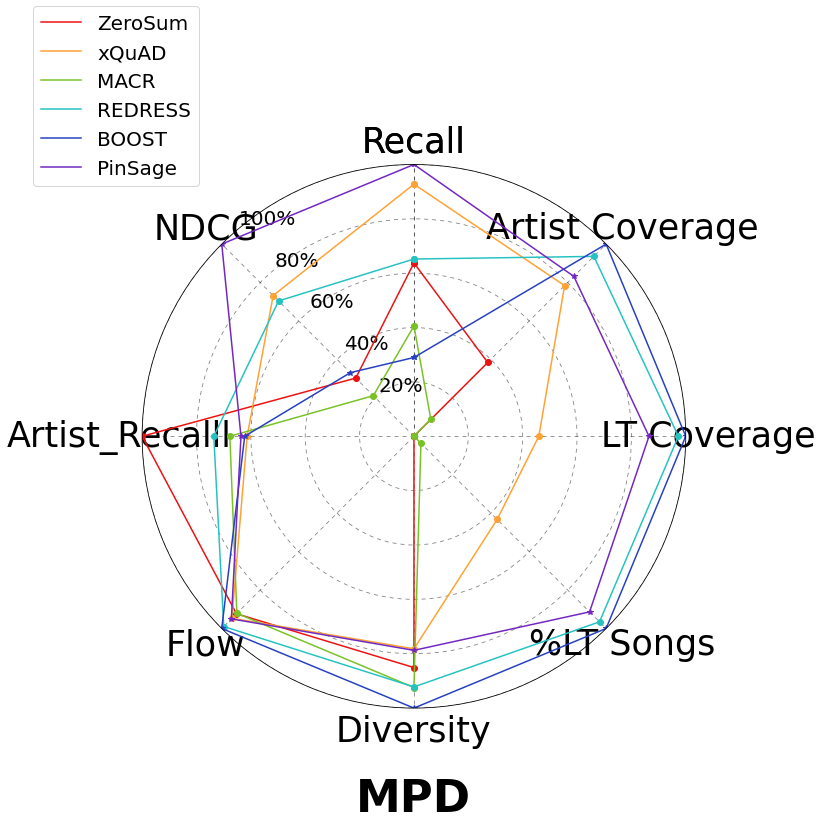

<Figure size 432x288 with 0 Axes>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import cm
import matplotlib.ticker as mtick

mpl.rcParams['font.size'] = 35
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Tahoma']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['xtick.major.pad']='100'
# pylab.rcParams['ytick.major.pad']='8'
# plt.rcParams['axes.xmargin'] = 0
# plt.rcParams['axes.ymargin'] = 0

fig, axes = plt.subplots(1, 1, figsize=(15, 10), subplot_kw=dict(projection="polar"))

"""MPD"""
# ax1 = fig.add_subplot(131, projection='polar')
p1, p2 = [], []

# SR
p1.append(get_info(scratch_path, 'MPD_Subset', 'SR2', fairness_method, 'G_0.1', 'T').values)
p2.append(get_info(scratch_path, 'LFM_Subset', 'SR2', fairness_method, 'G_0.5', "T").values)

# X
p1.append(get_info(scratch_path, 'MPD_Subset', 'XQUAD', fairness_method, 'G_0.1').values)
p2.append(get_info(scratch_path, 'LFM_Subset', 'XQUAD', fairness_method, 'G_0.1').values)

# MACR
p1.append(get_info(scratch_path, 'MPD_Subset', 'MACR', fairness_method, 5, 'T').values)
p2.append(get_info(scratch_path, 'LFM_Subset', 'MACR2', fairness_method, 5, 'T').values)

# REDRESS
p1.append(get_info(scratch_path, 'MPD_Subset', 'REDRESS', fairness_method, 'G_0.5', "T").values)
p2.append(get_info(scratch_path, 'LFM_Subset', 'REDRESS', fairness_method, 'G_0.2', "T").values)


# BOOST
p1.append(get_info(scratch_path, 'MPD_Subset', 'BOOST', fairness_method, 'G_0.5', "T").values)
p2.append(get_info(scratch_path, 'LFM_Subset', 'BOOST', fairness_method, 'G_0.6', "T").values)

# PS
p1.append(get_info(scratch_path, 'MPD_Subset', 'REDRESS', fairness_method, 'PinSage', 'T').values)
p2.append(get_info(scratch_path, 'LFM_Subset', 'REDRESS', fairness_method, 'PinSage', 'T').values)



def draw_row(ax, p, model_name, data_name, legend):
    p = np.array(p)
    p[:, 0] = p[:, 0] / max(p[:, 0])
    p[:, 1] = p[:, 1] / max(p[:, 1])
    p[:, 2] = p[:, 2] / max(p[:, 2]) 
    p[:, 3] = p[:, 3] / max(p[:, 3]) 
    p[:, 4] = p[:, 4] / max(p[:, 4]) 
    p[:, 5] = p[:, 5] / max(p[:, 5]) 
    p[:, 6] = p[:, 6] / max(p[:, 6])
    p[:, 7] = p[:, 7] / max(p[:, 7])
    p = p * 100

    data = []
    for i in range(len(p)):
        data.append(np.array(p[i]).astype(float))
    label = np.array(
        ['Recall', 'NDCG', 'Arid Recalll', 'Flow', 'Diversity', '%LT', 'LT CVG',
         "Artist Coverage"])
    label = np.concatenate((label, [label[0]]))

    theta = np.linspace(0, 2 * np.pi, len(data[0]), endpoint=False)
    thetas = np.concatenate((theta, [theta[0]]))
    data1 = np.concatenate((data[0], [data[0][0]]))# SR
    data2 = np.concatenate((data[1], [data[1][0]]))# X
    data3 = np.concatenate((data[2], [data[2][0]]))# MACR
    data4 = np.concatenate((data[3], [data[3][0]]))# REDRESS
    data5 = np.concatenate((data[4], [data[4][0]]))# BOOST
    data6 = np.concatenate((data[5], [data[5][0]])) #PS
    
    
    ax.set_thetagrids(thetas * 180 / np.pi, label)
    ax.tick_params(axis='x', which='major', pad=15)

    color = ['#ed1111', '#FFA233', '#79C226', '#26C2C2', '#2640C2', '#7226C2', '#D829A0']
    kwargs1 = {'color': color[0]}
    kwargs2 = {'color': color[1]}
    kwargs3 = {'color': color[2]}
    kwargs4 = {'color': color[3]}
    kwargs5 = {'color': color[4]}
    kwargs6 = {'color': color[5]}

    ax.plot(thetas, data1, 'o-', **kwargs1)
    ax.plot([], [], label='ZeroSum', **kwargs1)
    ax.plot(thetas, data2, 'o-', **kwargs2)
    ax.plot([], [], label='xQuAD', **kwargs2)
    ax.plot(thetas, data3, 'o-', **kwargs3)
    ax.plot([], [], label='MACR', **kwargs3)
    ax.plot(thetas, data4, 'o-', **kwargs4)
    ax.plot([], [], label='REDRESS', **kwargs4)
    ax.plot(thetas, data5, '*-', **kwargs5)
    ax.plot([], [], label='BOOST', **kwargs5)
    ax.plot(thetas, data6, '*-', **kwargs6)
    ax.plot([], [], label='PinSage', **kwargs6)
    ax.set_theta_zero_location('N')
    ax.set_rlim(0, 100)
    
    if legend: 
        ax.legend(loc=(-0.20, 0.96), fontsize=20)
    ax.set_rlabel_position(40) #40 
    ax.tick_params(pad=12, grid_color='k', grid_alpha=0.5, grid_linestyle=(0, (5, 5)))
    ax.set_title(f'{data_name}', fontsize=45, y=-0.2, fontname="Times New Roman", fontweight="bold")
    
    r_value = ['{:,.0f}'.format(x) + '%' for x in ax.get_yticks()]
    ax.set_yticklabels(r_value, fontsize=20)
    plt.show()


draw_row(axes, p1, '', 'MPD', legend=True)
# draw_row(axes, p2, '', 'LFM')


plt.tight_layout()


In [8]:
# import numpy as np
# from matplotlib.pyplot import figure, show, grid, tight_layout
# # make a square figure
# fig = figure(figsize=(2, 2))
# ax = fig.add_subplot(111, polar=True)
# ax.set_yticklabels([])

# r = np.arange(0, 3.0, 0.01)
# theta = 2*np.pi*r
# ax.plot(theta, r, color='#ee8d18', lw=3)
# ax.set_rmax(2.0)

# # tick locations
# thetaticks = np.arange(0,360,45)

# # set ticklabels location at 1.3 times the axes' radius
# ax.set_thetagrids(thetaticks,  frac=1.3)

# tight_layout()

# show()